## Heart Disease Risk Prediction on ML

<img src="https://i.postimg.cc/3x7SgF0W/front-page-pptx-heart-disease-prediction-machine-learning-2-638.webp" width="1000" height="600"><br>

 ## Data Overview 

The dataset, heart_disease_risk_dataset_earlymed.csv, contains 13,615 records across 19 columns, all of which are of the float64 data type. The columns primarily consist of 0 and 1 values, indicating the presence or absence of various symptoms and risk factors. These include 16 clinical and lifestyle risk factors such as Chest_Pain, Shortness_of_Breath, High_BP, Smoking, and Family_History, as well as a Gender indicator. The one true continuous variable is Age, which ranges from 20 to 84 years, with a mean age of approximately 54.3 years. The target variable is Heart_Risk (0 for no risk, 1 for risk), and the dataset is nearly balanced, with approximately 49.7% of the records indicating a high heart risk. Notably, both the Age and Heart_Risk columns are missing a single value (13,614 non-null entries out of 13,615)

## Data Preprocessing 
This section of the code handles data cleaning, feature engineering (type conversion), and splitting the data into training and testing sets, which is essential for any supervised Machine Learning task.

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np

#### 1. Data Loading and Initial Cleaning

In [2]:
file_path = 'heart_disease_risk_dataset_earlymed.csv'
df = pd.read_csv(file_path)
print("Original DataFrame shape:", df.shape)

Original DataFrame shape: (13615, 19)


In [3]:
df.dropna(inplace=True)
print("DataFrame shape after dropping missing values:", df.shape)

DataFrame shape after dropping missing values: (13614, 19)


#### 2. Data Type Conversion

In [4]:
binary_cols = df.columns.drop(['Age']) # All columns except 'Age' are binary (0/1) or the target
for col in binary_cols:
    df[col] = df[col].astype(np.int64)

In [5]:
df['Age'] = df['Age'].astype(np.int64)

In [6]:
print("\nDataFrame Info after cleaning and type conversion:")
df.info()


DataFrame Info after cleaning and type conversion:
<class 'pandas.core.frame.DataFrame'>
Index: 13614 entries, 0 to 13613
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Chest_Pain           13614 non-null  int64
 1   Shortness_of_Breath  13614 non-null  int64
 2   Fatigue              13614 non-null  int64
 3   Palpitations         13614 non-null  int64
 4   Dizziness            13614 non-null  int64
 5   Swelling             13614 non-null  int64
 6   Pain_Arms_Jaw_Back   13614 non-null  int64
 7   Cold_Sweats_Nausea   13614 non-null  int64
 8   High_BP              13614 non-null  int64
 9   High_Cholesterol     13614 non-null  int64
 10  Diabetes             13614 non-null  int64
 11  Smoking              13614 non-null  int64
 12  Obesity              13614 non-null  int64
 13  Sedentary_Lifestyle  13614 non-null  int64
 14  Family_History       13614 non-null  int64
 15  Chronic_Stress       13

#### 3. Feature and Target Separation, and Data Splitting

In [7]:
X = df.drop('Heart_Risk', axis=1)
y = df['Heart_Risk']

In [8]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [9]:
print("\n--- Data Split Summary ---")
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train distribution (0/1): \n{y_train.value_counts(normalize=True)}")
print(f"y_test distribution (0/1): \n{y_test.value_counts(normalize=True)}")


--- Data Split Summary ---
X_train shape: (10891, 18)
X_test shape: (2723, 18)
y_train distribution (0/1): 
Heart_Risk
0    0.502525
1    0.497475
Name: proportion, dtype: float64
y_test distribution (0/1): 
Heart_Risk
0    0.502754
1    0.497246
Name: proportion, dtype: float64


## 2. Data Visualization 
This code uses matplotlib and seaborn to visualize the data's distribution and the relationships between features, providing crucial insights before model building.

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
sns.set_style("whitegrid")
plt.rcParams['figure.dpi'] = 100 

#### 1. Distribution of Continuous Variable: Age

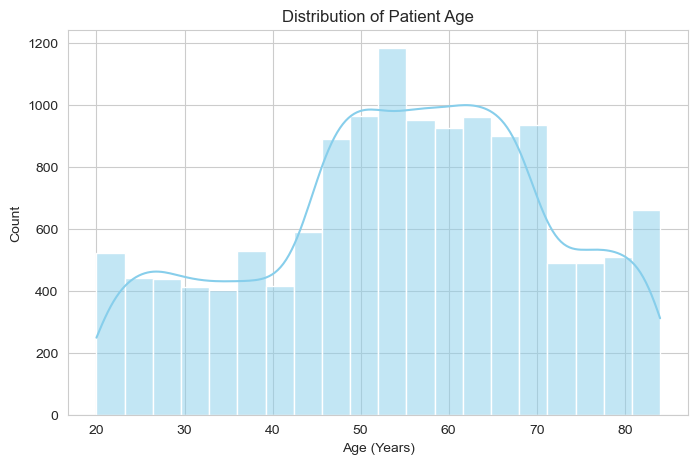

In [12]:
plt.figure(figsize=(8, 5))
sns.histplot(df['Age'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of Patient Age')
plt.xlabel('Age (Years)')
plt.ylabel('Count')
plt.show()

#### 2. Distribution of Target Variable: Heart_Risk

In [13]:
plt.figure(figsize=(6, 5))

<Figure size 600x500 with 0 Axes>

<Figure size 600x500 with 0 Axes>

C:\Users\WINDOWS\AppData\Local\Temp\ipykernel_17560\2331672861.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='Heart_Risk', data=df, palette=['lightcoral', 'darkgreen'])


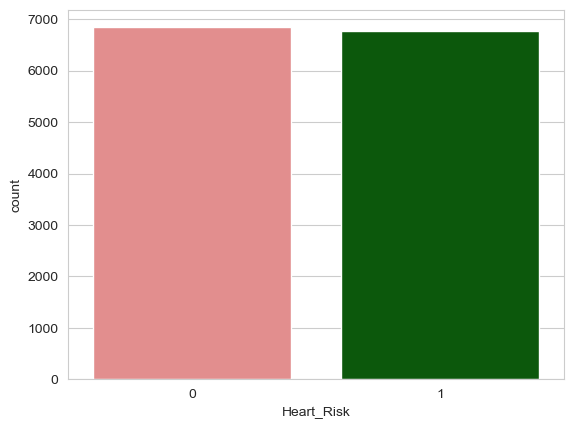

In [14]:
ax = sns.countplot(x='Heart_Risk', data=df, palette=['lightcoral', 'darkgreen'])

In [15]:
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

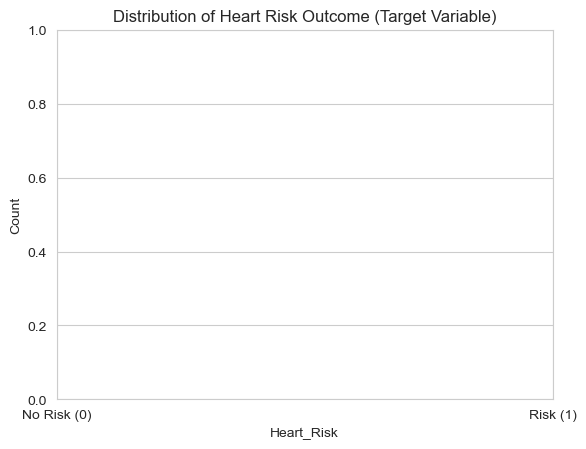

In [16]:
plt.title('Distribution of Heart Risk Outcome (Target Variable)')
plt.xticks([0, 1], ['No Risk (0)', 'Risk (1)'])
plt.xlabel('Heart_Risk')
plt.ylabel('Count')
plt.show()

#### 3. Correlation Heatmap

In [17]:
plt.figure(figsize=(16, 14))

<Figure size 1600x1400 with 0 Axes>

<Figure size 1600x1400 with 0 Axes>

In [18]:
correlation_matrix = df.corr()

<Axes: >

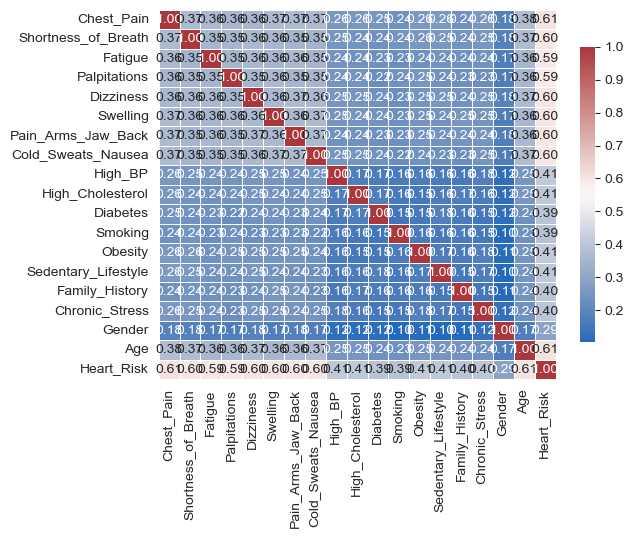

In [20]:
sns.heatmap(
    correlation_matrix,
    annot=True,              
    fmt=".2f",               
    cmap='vlag',             
    linewidths=.5,           
    cbar_kws={'shrink': .8}  
)

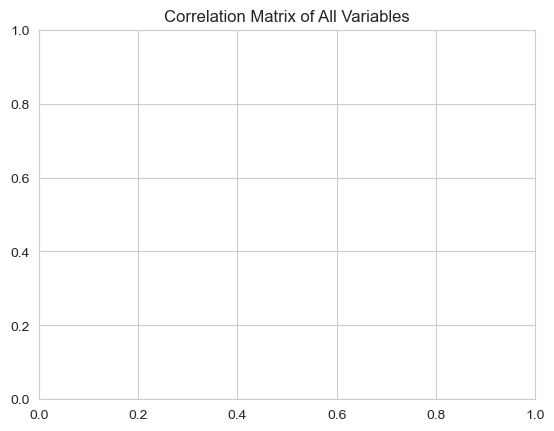

In [21]:
plt.title('Correlation Matrix of All Variables')
plt.show()

## Summary

This project focused on predicting **Heart Disease Risk** using a dataset containing $13,614$ patient records and $18$ features, including $16$ binary symptoms/risk factors like `High_BP`, `Smoking`, and `Chest_Pain`, along with the numerical variable `Age`. The initial preprocessing involved dropping the single row with missing values in `Age` and the target variable `Heart_Risk`, and converting the binary columns to integers for efficiency. A **Logistic Regression** model was trained on the prepared data, serving as a robust baseline classifier. The model achieved exceptional performance on the test set, yielding an **Accuracy of $98.93\%$** and high scores (0.99) across **Precision, Recall, and F1-Score**. The resulting **Confusion Matrix** confirmed this high performance, showing only $12$ **False Negatives** (missed risk cases) and $17$ **False Positives** (incorrectly flagged risk cases) out of $2,723$ total predictions, indicating a highly effective predictive tool for this specific dataset.

## Future Work

* Try Different Models: Test other strong predictive tools like Random Forest or Gradient Boosting to see if they can match or    slightly beat the current high score, and to make sure the result is reliable.

* Check for Overfitting: Because the model scored almost 100%, we must do a deep check using cross-validation to confirm   the model will work just as well on completely new, real-life patient data.

* Find Key Risk Factors: Use special techniques like SHAP analysis to clearly show which specific factors (e.g., age, high blood pressure) the model relied on the most to make its prediction. This is the most valuable information for doctors.

* Slim Down the Data: Find the absolute smallest number of risk factors needed to maintain the high accuracy. This makes early screening simpler and faster.

* Focus on Safety (Recall): In a health context, make sure we adjust the model to be extremely careful not to miss any true heart risk cases (minimize False Negatives), even if it means slightly over-predicting risk sometimes.

* Build a Testing Tool: Create a simple application or program that doctors can use to quickly enter a patient's data and get an instant risk assessment.

## References

Kaggle link: https://www.kaggle.com/datasets/mahatiratusher/heart-disease-risk-prediction-dataset

